In [24]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [25]:
df = pd.read_csv('creditcard.csv')

In [26]:
# Explore the features available in your dataframe
print(df.info())
print(df.head())
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [27]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

# Create X and y from the prep_data function 
#X, y = df.V1, df.Class
X=df.drop(columns=['Time','Class'])
y=df.Class
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Plot our data by running our plot data function on X and y
#plot_data(X, y)

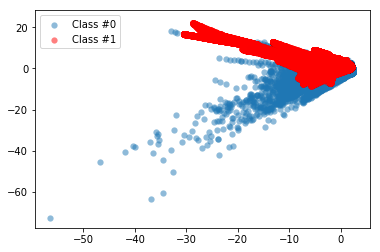

In [28]:
# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

In [29]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
#compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

0    284315
1       492
Name: Class, dtype: int64
1    199008
0    199008
dtype: int64


In [30]:
# Fit a logistic regression model to our data
model = LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85295    12]
 [   51    85]]


In [31]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [9]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.15      0.86      0.26       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.93      0.63     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84578   718]
 [   20   127]]


In [32]:
def get_model_results(xtrain, ytrain, xtest, ytest, model):
    model.fit(xtrain, ytrain)
    # Obtain model predictions
    predicted = model.predict(xtest)

    # Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(ytest, predicted))
    conf_mat = confusion_matrix(y_true=ytest, y_pred=predicted)
    print('Confusion matrix:\n', conf_mat)


In [33]:
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
get_model_results(X_train, y_train, X_test, y_test, model)

/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.85      0.77       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.85      0.93      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85259    48]
 [   20   116]]


In [34]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
model = RandomForestClassifier(random_state=5)
model.fit(X_resampled, y_resampled)
predicted = model.predict(X_test)
print(accuracy_score(predicted, y_test))


/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9994850368081645


In [45]:
get_model_results(X_resampled, y_resampled, X_test, y_test, model)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.85      0.84       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    24]
 [   20   116]]


In [39]:
from sklearn.ensemble import VotingClassifier

In [46]:
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

In [47]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')


In [48]:
get_model_results(X_resampled, y_resampled, X_test, y_test, ensemble_model)


/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.94      0.08       136

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Confusion matrix:
 [[82254  3053]
 [    8   128]]


In [94]:
data.head()#Features V1, V2, ... V28 are the principal 
# components obtained with PCA, the only features which 
# have not been transformed with PCA are 'Time' and 'Amount'
# Principal component analysis (PCA) is a statistical procedure
#that uses an orthogonal transformation to convert a set of 
# observations of possibly correlated variables 
# (entities each of which takes on various numerical values) 
# into a set of values of linearly uncorrelated variables called principal components

# Class value of 1 means fraud, 0 is not fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
data = data.dropna()
data.shape #drop any potential n/a values and see if any data is lost

(284807, 31)

In [96]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [109]:
print("Number of fraudulent interactions: ", data.query('Class == 1').shape[0])
print("Number of genuine interactions: ", data.query('Class == 0').shape[0])
print("Fraction of genuine interactions to throw out to even the count: ", 1.-round(data.query('Class == 1').shape[0]/data.query('Class == 0').shape[0], 4))

Number of fraudulent interactions:  492
Number of genuine interactions:  284315
Fraction of genuine interactions to throw out to even the count:  0.9983


In [120]:
trimmed_data=data.drop(data.query('Class == 0').sample(frac=.9975).index)

In [121]:
print("Number of fraudulent interactions: ", trimmed_data.query('Class == 1').shape[0])
print("Number of genuine interactions: ", trimmed_data.query('Class == 0').shape[0])

Number of fraudulent interactions:  492
Number of genuine interactions:  711


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [123]:
y=trimmed_data[['Class']].copy() #store target as y
X = trimmed_data.drop('Class', 1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)

In [131]:
classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(X_train, y_train)
predictions = humidity_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.921161825726141

In [135]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [[-6.17449456e-07 -1.85103904e-02 -6.92502547e-03 -1.58567831e-02
   5.32783889e-02  4.40039564e-03 -1.29041985e-02  2.78074379e-02
  -1.97462823e-02  1.33526921e-02 -1.25743113e-02  1.15827772e-03
   1.58903246e-02 -1.28803293e-02 -6.16024227e-02 -3.57613543e-03
   3.10675023e-03 -1.34225812e-02  2.47951836e-02  7.40207081e-03
  -1.54435867e-02  6.33607968e-03  3.89995958e-02 -3.60158274e-02
   5.69653087e-04  8.52784298e-03 -6.00303091e-02 -1.81367059e-02
   1.01716202e-01  6.76224351e-05]]
Mean squared error: 0.08
Variance score: 0.68


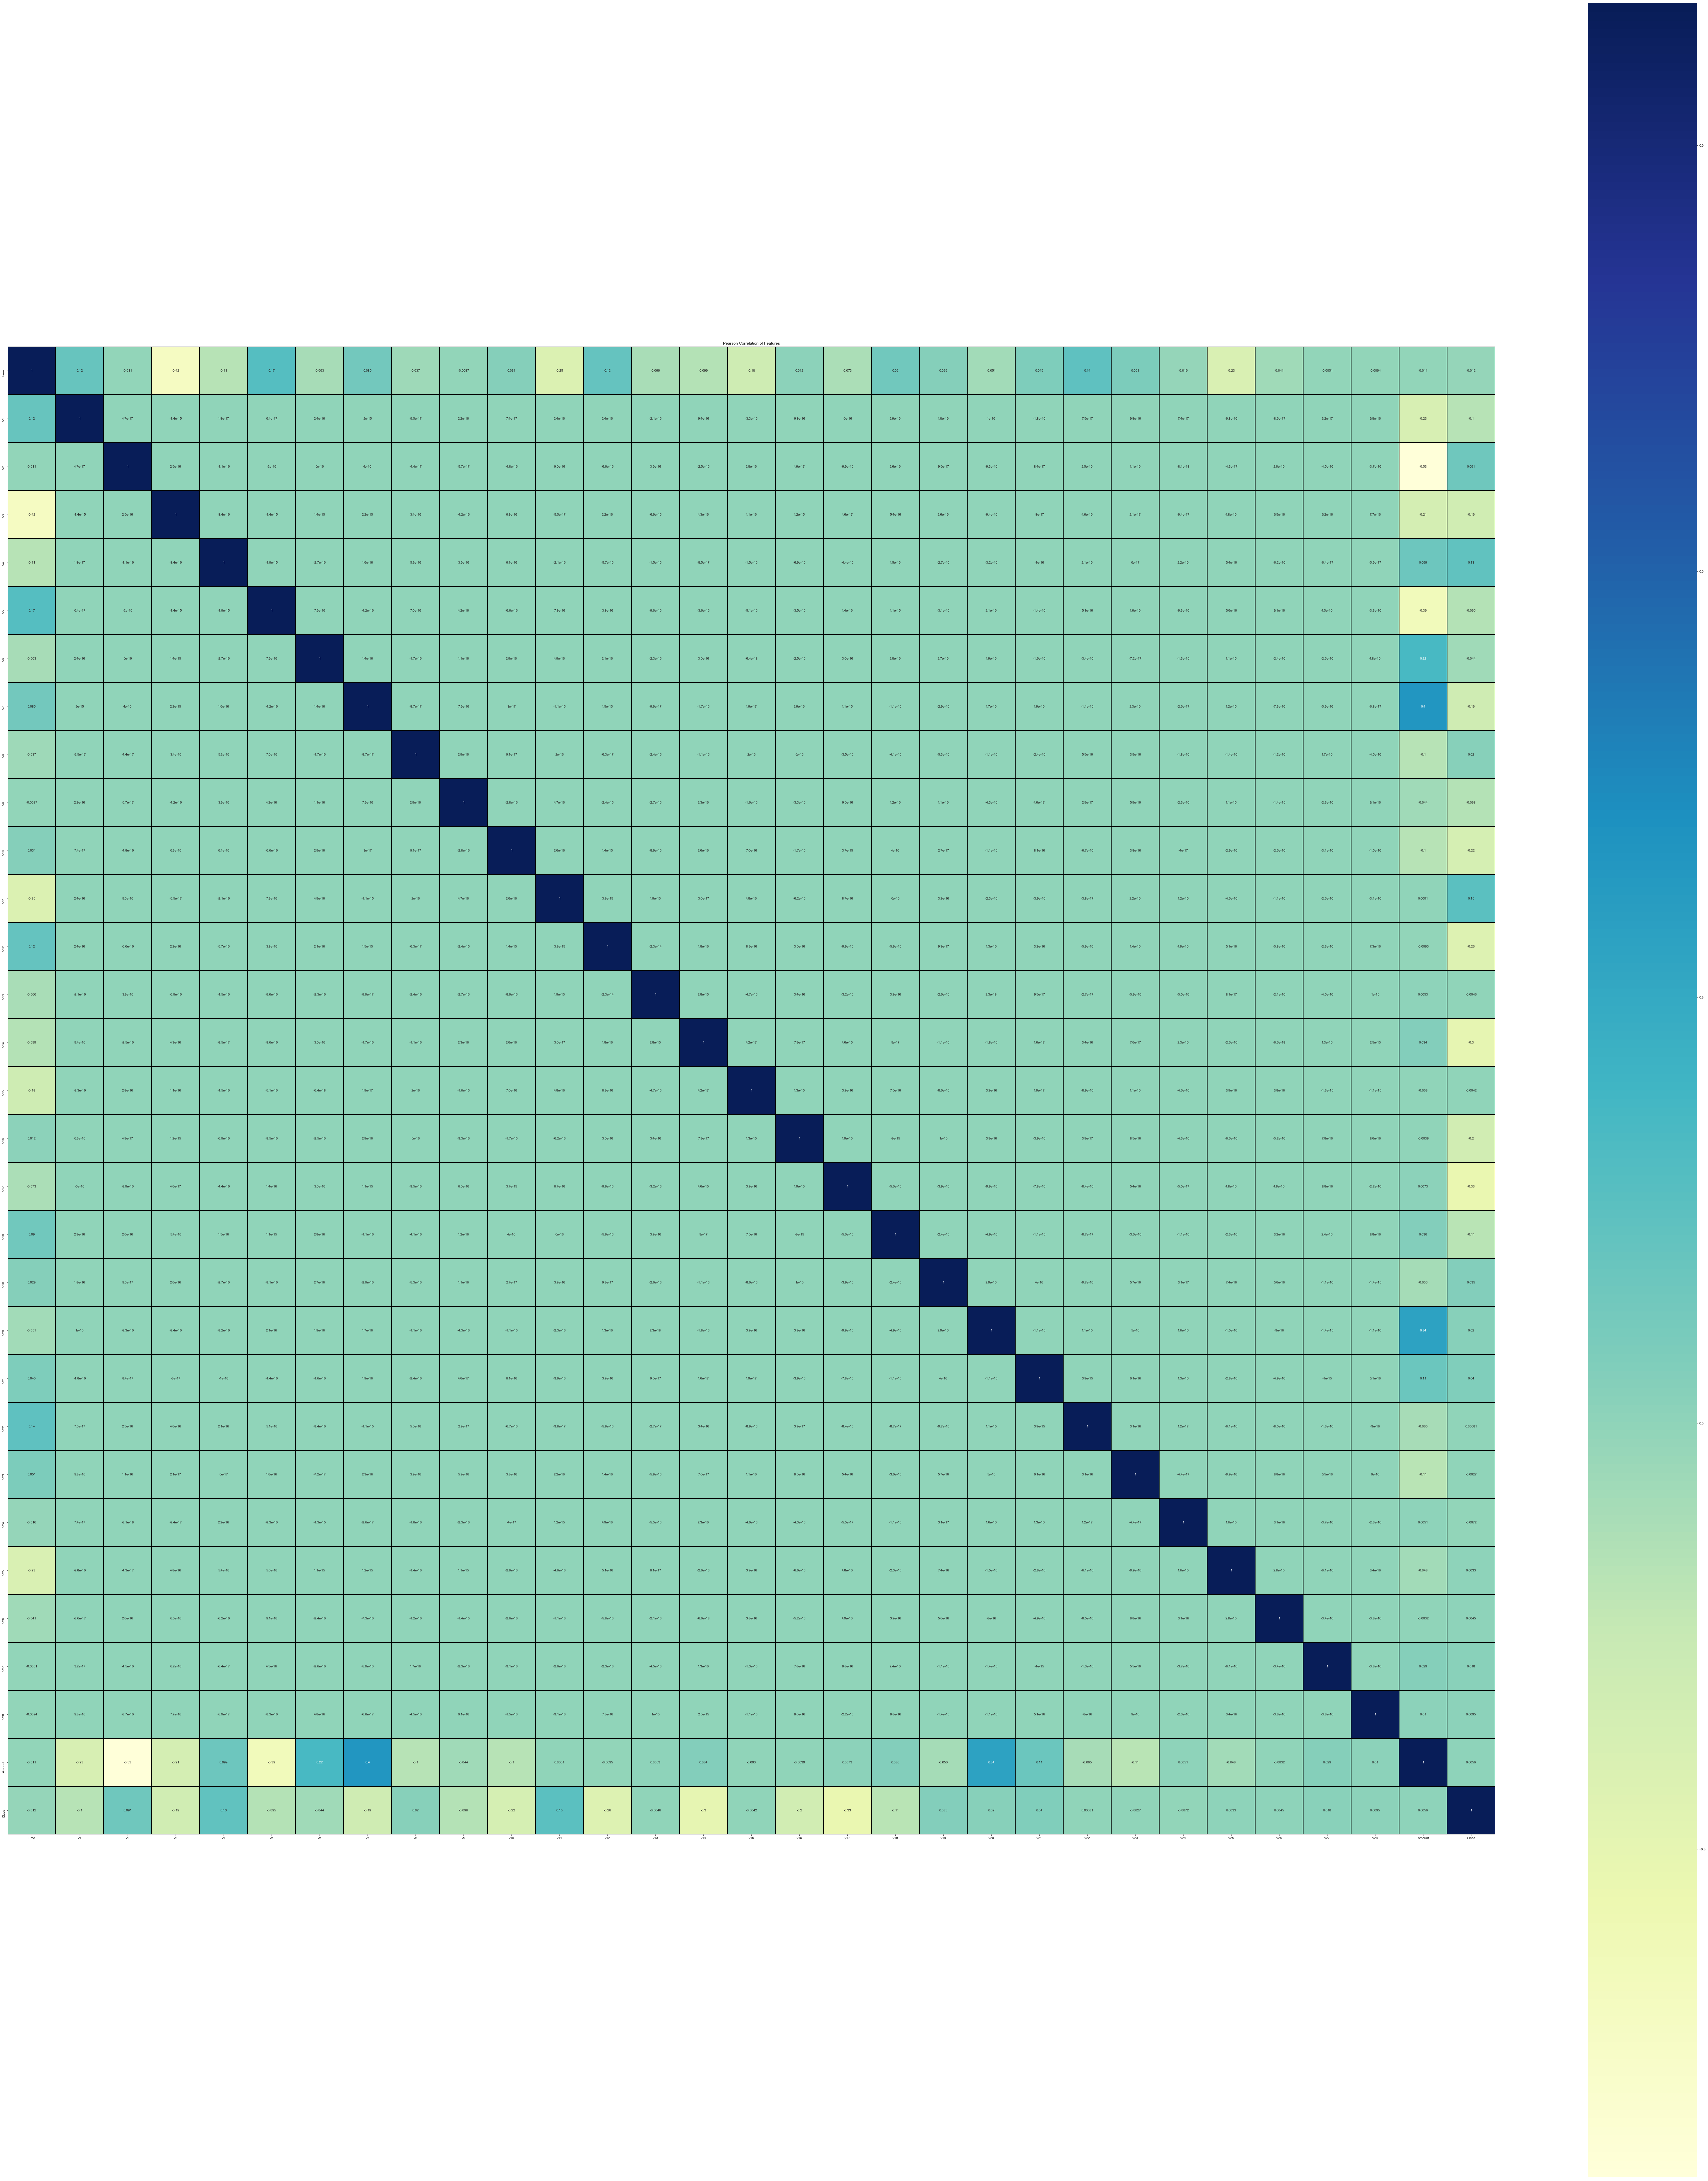

In [144]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 120))
plt.title('Pearson Correlation of Features')

# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=1.,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)
sns.set(font_scale=5)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
y=data[['Class']].copy()
X = data.drop('Class', 1) #Get rid of classification so we don't give an artificial bias
X = StandardScaler().fit_transform(X)
X #Standardization of a dataset is a common 
# requirement for many machine learning estimators: 
# they might behave badly if the individual feature do 
# not more or less look like standard normally distributed data 
# (e.g. Gaussian with 0 mean and unit variance).

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [46]:
X_train, X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
#kmeans.labels_
kmeans.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

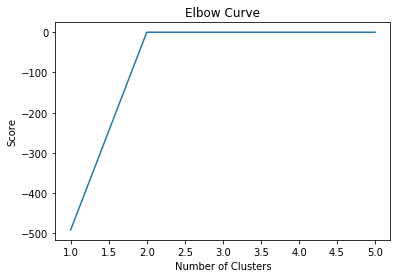

In [51]:
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [90]:
print(y_test.iloc[100])

Class    0
Name: 184370, dtype: int64
